In [15]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [7]:
gold_data = pd.read_csv('gld_price_data.csv')
gold_data.head(20)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099
5,1/9/2008,1409.130005,86.550003,75.250000,15.520000,1.466405
6,1/10/2008,1420.329956,88.250000,74.019997,16.061001,1.480100
7,1/11/2008,1401.020020,88.580002,73.089996,16.077000,1.479006
8,1/14/2008,1416.250000,89.540001,74.250000,16.280001,1.486900
9,1/15/2008,1380.949951,87.989998,72.779999,15.834000,1.480210


In [9]:
gold_data.shape

(2290, 6)

In [10]:
gold_data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [12]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [13]:
corr = gold_data.corr()
corr

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


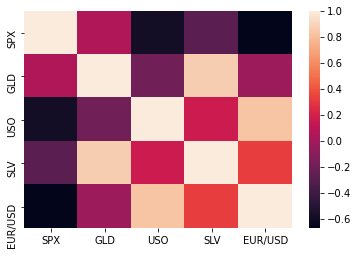

In [20]:
sns.heatmap(corr)

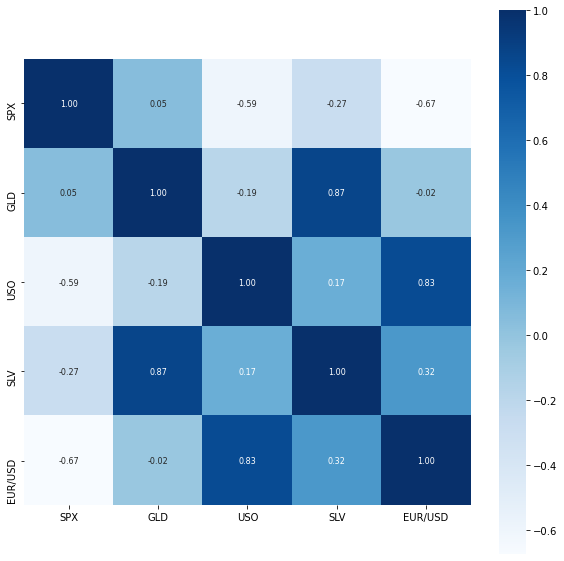

In [27]:
plt.figure(figsize=(10,10))
sns.heatmap(corr,cbar=True,square=True,annot=True,fmt='.2f',
            annot_kws={'size':8},cmap='Blues')

In [35]:
print(corr['GLD'])
print()
print(corr['SLV'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

SPX       -0.274055
GLD        0.866632
USO        0.167547
SLV        1.000000
EUR/USD    0.321631
Name: SLV, dtype: float64


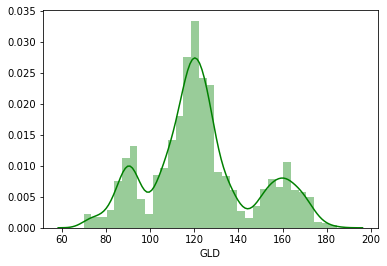

In [38]:
# check distribution
sns.distplot(gold_data['GLD'],color='green')

In [39]:
X = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [41]:
# split data into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=2)

In [42]:
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [47]:
predicted_values = regressor.predict(X_test)
predicted_values

array([168.73459975,  81.89120004, 116.0913    , 127.60950055,
       120.79130147, 154.82349758, 150.16719904, 126.07130019,
       117.43429877, 126.03060078, 116.47220102, 172.08960049,
       141.89309831, 167.77459865, 115.25009991, 117.5158005 ,
       139.17510376, 170.12220087, 158.99070262, 159.62159963,
       154.9194001 , 125.56670018, 175.36249996, 156.92360371,
       125.14980008,  93.74849978,  77.74800018, 120.45390011,
       118.97849895, 167.57770017,  88.14430071, 125.29609937,
        91.38140072, 117.75990006, 121.12009926, 136.00480096,
       115.47300132, 115.11780081, 146.43899916, 107.23010123,
       104.63720208,  87.20409798, 126.46090037, 118.05660008,
       152.50469925, 119.58509974, 108.46429984, 108.08379845,
        93.28580084, 127.07379796,  75.13440044, 113.70429918,
       121.56739983, 111.13949919, 118.88839892, 120.46409965,
       159.00679882, 168.74900056, 146.76619658,  85.79379859,
        94.34400029,  86.82809852,  90.5571    , 119.12

In [48]:
# compare predicted values with the actual values
# R squared error

error_score = metrics.r2_score(y_test,predicted_values)
error_score

0.9887481162619867

In [49]:
y_test = list(y_test)
y_test

[168.020004,
 81.230003,
 112.32,
 127.589996,
 119.620003,
 154.21000700000002,
 148.91000400000001,
 126.190002,
 117.470001,
 125.739998,
 115.379997,
 167.119995,
 141.630005,
 169.559998,
 115.599998,
 119.66999799999999,
 132.949997,
 170.399994,
 159.369995,
 173.529999,
 154.720001,
 128.119995,
 177.720001,
 157.190002,
 125.309998,
 93.400002,
 76.790001,
 119.690002,
 118.989998,
 167.389999,
 87.5,
 124.980003,
 91.230003,
 115.489998,
 120.949997,
 133.809998,
 116.690002,
 113.809998,
 133.580002,
 105.970001,
 105.120003,
 87.959999,
 126.82,
 116.860001,
 159.259995,
 119.459999,
 109.160004,
 108.620003,
 93.269997,
 127.160004,
 72.260002,
 113.470001,
 119.68,
 109.139999,
 119.309998,
 120.050003,
 159.889999,
 161.490005,
 146.740005,
 85.809998,
 93.709999,
 85.550003,
 91.029999,
 118.489998,
 126.449997,
 126.980003,
 171.699997,
 122.400002,
 116.410004,
 97.959999,
 169.630005,
 142.639999,
 131.809998,
 121.360001,
 124.0,
 119.699997,
 113.889999,
 118.91999

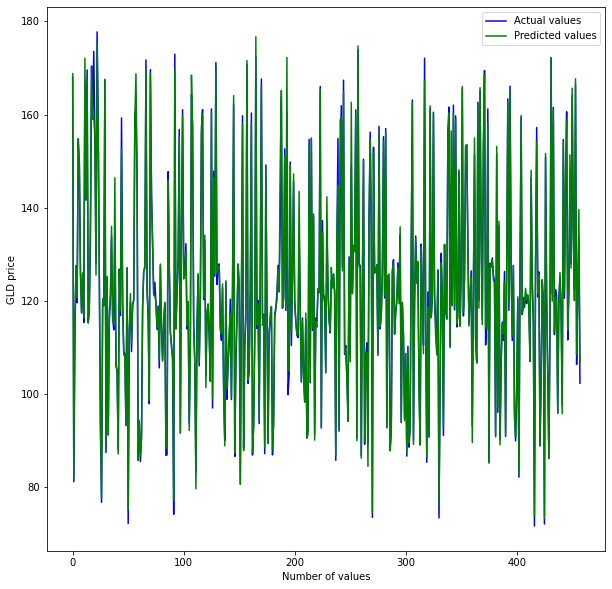

In [55]:
plt.figure(figsize=(10,10))
plt.plot(y_test,color='blue',label='Actual values')
plt.plot(predicted_values,color='green',label='Predicted values')
plt.xlabel('Number of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()

In [60]:
regressor.score(X_test,y_test)

0.9887481162619867